### Assignment 2
**Mouley S. :** **EG/2019/3673**





# **Task 1**

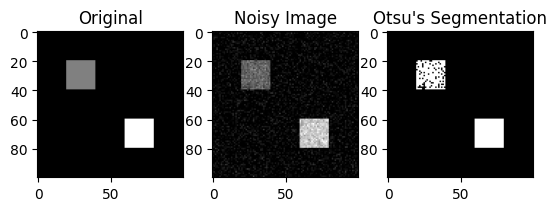

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def add_gaussian_noise(image, mean=0, sigma=20):

    gauss = np.random.normal(mean, sigma, image.shape)
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)


def otsu_threshold(image):                    # Apply Otsu's thresholding algorithm
    _, th = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return th


image = np.zeros((100, 100), dtype=np.uint8)    # Generate a synthetic image with two objects and background
image[20:40, 20:40] = 100  # First object
image[60:80, 60:80] = 200  # Second object


noisy_image = add_gaussian_noise(image, mean=0, sigma=20)     # Add Gaussian noise with adjusted parameters


otsu_result = otsu_threshold(noisy_image)   # Apply Otsu's algorithm


plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original')   # Display original, noisy, and segmented images
plt.subplot(132), plt.imshow(noisy_image, cmap='gray'), plt.title('Noisy Image')
plt.subplot(133), plt.imshow(otsu_result, cmap='gray'), plt.title("Otsu's Segmentation")
plt.show()


# **Task 2**

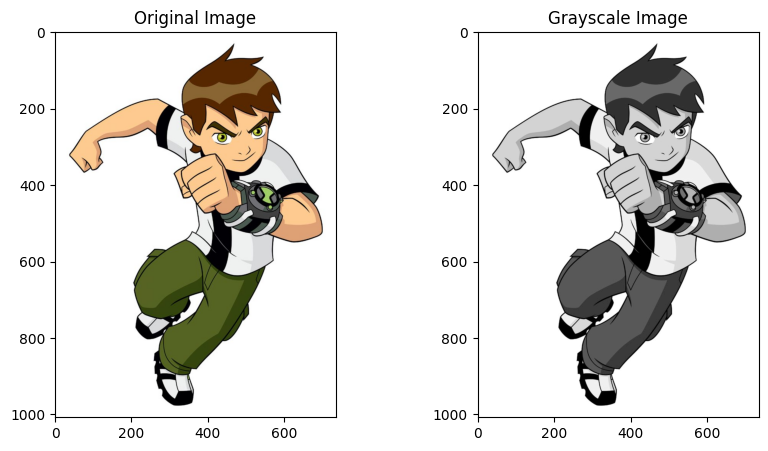

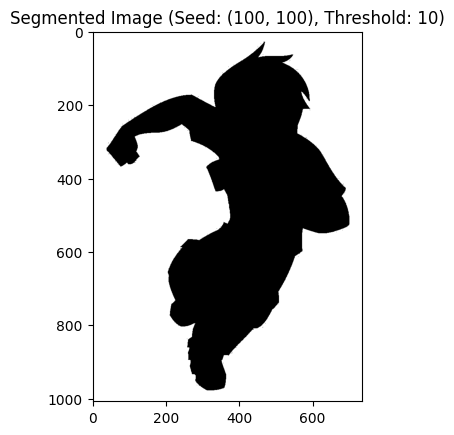

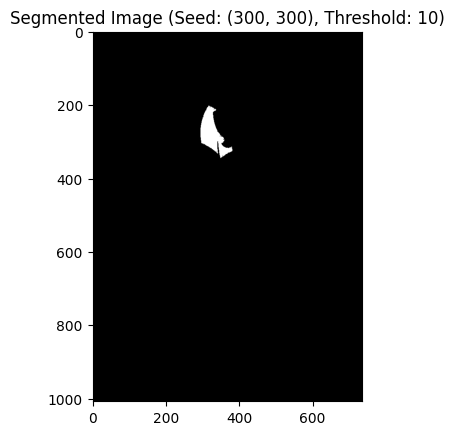

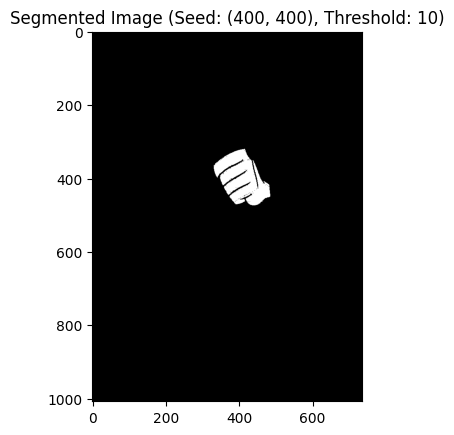

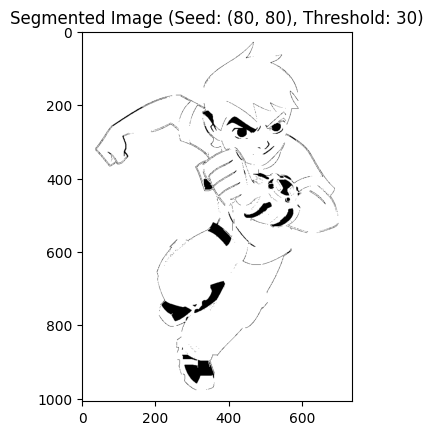

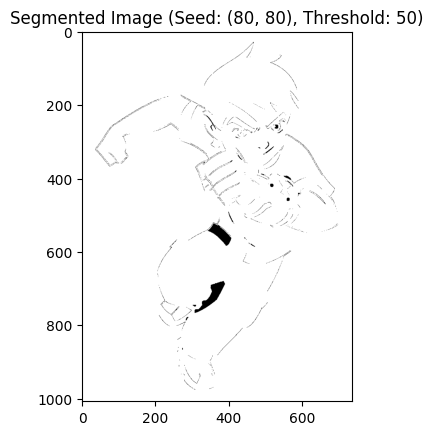

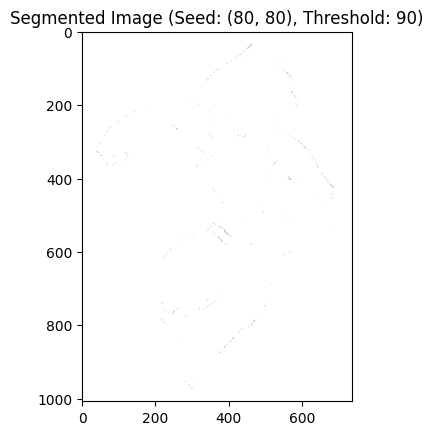

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/Ben10_2.jpg'


def display_original_and_gray(image_path):        # Function to display the original and grayscale images

    original_image = cv2.imread(image_path)
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Grayscale Image')

    plt.show()


def region_growing(image_path, seed, threshold):      # Function to perform region growing and display the segmented image

    original_image = cv2.imread(image_path)
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)


    height, width = grayscale_image.shape           # Parameters for region growing
    visited = np.zeros((height, width))
    dx = [-1, 0, 1, 0]
    dy = [0, 1, 0, -1]
    stack = [seed]

    while len(stack) > 0:
        s = stack.pop()
        visited[s[0], s[1]] = 255

        for direction in range(4):
            x = s[0] + dx[direction]
            y = s[1] + dy[direction]

            if x >= 0 and x < height and y >= 0 and y < width:
                if visited[x, y] == 0 and abs(int(grayscale_image[s]) - int(grayscale_image[x, y])) <= threshold:
                    stack.append((x, y))


    plt.figure()              # Display the segmented image
    plt.imshow(visited, cmap='gray')
    plt.title('Segmented Image (Seed: {}, Threshold: {})'.format(seed, threshold))
    plt.show()


display_original_and_gray(image_path)         # Display original and grayscale images

# Fixed thresold 0f 10 with changing seed_point
seed_point = (100, 100)
threshold_value = 10
region_growing(image_path, seed_point, threshold_value)


# Fixed thresold 0f 10 with changing seed_point
seed_point = (300, 300)
threshold_value = 10
region_growing(image_path, seed_point, threshold_value)



# Fixed thresold 0f 10 with changing seed_point
seed_point = (400, 400)
threshold_value = 10
region_growing(image_path, seed_point, threshold_value)



# Fixed seed_point of (80,80) with changing thresold value
seed_point = (80, 80)
threshold_value = 30
region_growing(image_path, seed_point, threshold_value)


# Fixed seed_point of (80,80) with changing thresold value
seed_point = (80, 80)
threshold_value = 50
region_growing(image_path, seed_point, threshold_value)


# Fixed seed_point of (80,80) with changing thresold value
seed_point = (80, 80)
threshold_value = 90
region_growing(image_path, seed_point, threshold_value)

